In [1]:
from linares_plot import *
import sys, os
path_tools = 'C:\\Users\\David\\Documents\\GitHub\\encoding\\scripts\\wm_representation\\functions\\IEM\\tools'
sys.path.insert(1, path_tools)
from tiemcourse_interference import *
from scipy import stats
from scipy.stats import norm
import statsmodels.formula.api as smf


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
df = pd.read_excel('C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainT_decoded_angle10_complete.xlsx')
len(df)

89856

In [4]:
def err_deg(a1,ref):
    ### Calculate the error ref-a1 in an efficient way in the circular space
    ### it uses complex numbers!
    ### Input in degrees (0-360)
    a1=np.radians(a1)
    ref=np.radians(ref)
    err = np.angle(np.exp(1j*ref)/np.exp(1j*(a1) ), deg=True) 
    err=round(err, 2)
    return err

In [5]:
error_ = [err_deg(df.iloc[i].decoded_angle, df.iloc[i].target_centered) for i in range(len(df)) ]
distr_distance = [err_deg(df.iloc[i].distractor_centered, df.iloc[i].target_centered) for i in range(len(df)) ]

df['error'] = error_
df['error_abs'] = abs(np.array(error_))
df['distractor_distance'] = distr_distance
df['distractor_distance_abs'] = abs(np.array(distr_distance))

df['sign_dist'] = df.distractor_distance<0
df['sign_dist'] = df['sign_dist'].replace([True, False], ['ccw', 'cw']) #position of the distractor relative to the target

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in cdouble_scalars
  import sys


In [6]:
df

,Unnamed: 0,TR,actual_Error,actual_NT1,actual_NT2,actual_T,actual_dist,actual_dist1,actual_dist2,actual_response,...,label_distractor,label_target,new_index,subject,target_centered,error,error_abs,distractor_distance,distractor_distance_abs,sign_dist
0,0,9.340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Dist,T,2,d001,180,-2.24,2.24,-17.6,17.6,ccw
1,1,9.340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Dist_NT1,NT1,2,d001,180,-1.58,1.58,-24.2,24.2,ccw
2,2,9.340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Dist_NT2,NT2,2,d001,180,-6.54,6.54,-59.0,59.0,ccw
3,3,9.340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Dist,T,10,d001,180,8.15,8.15,173.0,173.0,cw
4,4,9.340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Dist_NT1,NT1,10,d001,180,25.55,25.55,12.8,12.8,cw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89851,1195,35.025,-3.0,47.0,210.0,308.0,130.0,64.9,235.4,311.0,...,Dist_NT1,NT1,16,l001,180,-23.24,23.24,-17.9,17.9,ccw
89852,1196,35.025,-3.0,47.0,210.0,308.0,130.0,64.9,235.4,311.0,...,Dist_NT2,NT2,16,l001,180,-11.13,11.13,-25.4,25.4,ccw
89853,1197,35.025,-3.0,133.0,219.0,290.0,303.1,159.0,29.0,293.0,...,Dist,T,26,l001,180,43.10,43.10,-13.1,13.1,ccw
89854,1198,35.025,-3.0,133.0,219.0,290.0,303.1,159.0,29.0,293.0,...,Dist_NT1,NT1,26,l001,180,34.70,34.70,-26.0,26.0,ccw


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


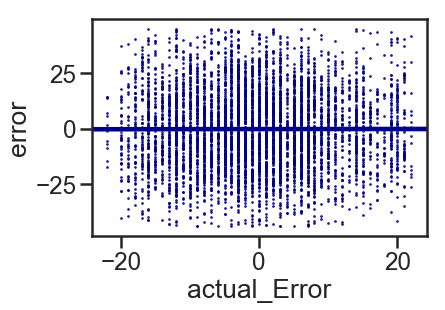

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: actual_Error
No. Observations: 5915    Method:             REML        
No. Groups:       6       Scale:              87.1534     
Min. group size:  864     Likelihood:         -21619.5998 
Max. group size:  1036    Converged:          Yes         
Mean group size:  985.8                                   
-----------------------------------------------------------
            Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept   -0.686     0.764  -0.898  0.369  -2.184   0.811
error        0.004     0.007   0.642  0.521  -0.009   0.018
Group Var    3.415     0.237                               



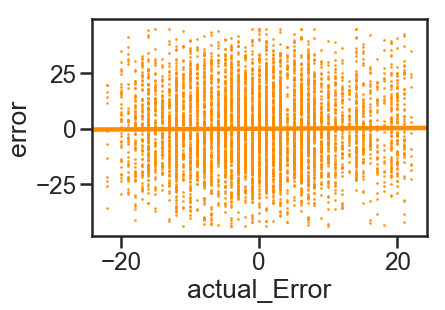

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: actual_Error
No. Observations: 5941    Method:             REML        
No. Groups:       6       Scale:              87.3959     
Min. group size:  873     Likelihood:         -21722.7408 
Max. group size:  1039    Converged:          Yes         
Mean group size:  990.2                                   
-----------------------------------------------------------
            Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept   -0.703     0.755  -0.931  0.352  -2.183   0.778
error        0.003     0.007   0.433  0.665  -0.011   0.017
Group Var    3.335     0.232                               



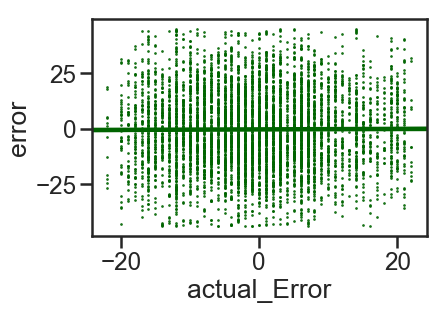

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: actual_Error
No. Observations: 5920    Method:             REML        
No. Groups:       6       Scale:              86.9965     
Min. group size:  864     Likelihood:         -21632.5336 
Max. group size:  1049    Converged:          Yes         
Mean group size:  986.7                                   
-----------------------------------------------------------
            Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept   -0.725     0.765  -0.947  0.343  -2.225   0.775
error        0.002     0.007   0.342  0.732  -0.011   0.016
Group Var    3.426     0.238                               



In [64]:
colors_ = ['darkblue', 'darkorange', 'darkgreen']

for idxr, Region in enumerate(['visual', 'ips', 'pfc']):
    #
    df_corr = df.loc[(df['actual_Error']>-999) & 
                      (df['error']>-999) &
                      (df['label_target']=='T') & 
                      (df['brain_region']==Region) & 
                      ((df['TR']>5) | (df['TR']<2)) & 
                      (df['actual_Error']<22.5) & (df['actual_Error']>-22.5)]
    #
    sns.regplot(df_corr.actual_Error, df_corr.error, marker="o", color=colors_[idxr], scatter_kws={'s':3} )
    plt.show()
    #
    #res_m = smf.ols(formula='actual_Error ~ error', data=df_corr).fit()
    res_m = smf.mixedlm(formula='actual_Error ~ error', data=df_corr,
                    groups=df_corr['subject']).fit()
    print(res_m.summary())

In [ ]:
#### Eso no es del todo correcto, ahora deberi coger unicamente el delay period de las condiciones y correlacionar. 
#### O solo el delay antes de la repsonse

In [52]:
## Delay pre response

In [65]:
c1_02 = df.loc[(df['condition']=='1_0.2') & 
                   ( df['TR']==16.345) ]

c1_7 = df.loc[(df['condition']=='1_7') & 
                   (df['TR']== 11.675) ]

c2_02 = df.loc[(df['condition']=='2_0.2') & 
                   (df['TR']== 16.345) ]

c2_7 = df.loc[(df['condition']=='2_7') & 
                   ( df['TR']== 23.35) ]


df_delay_target = pd.concat([c1_02, c1_7, c2_02, c2_7])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


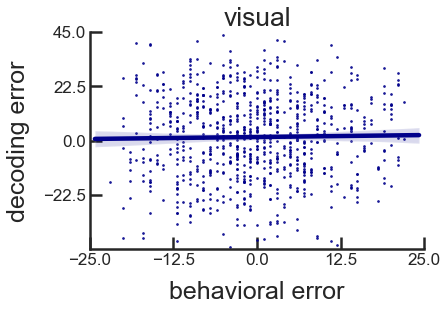

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: actual_Error
No. Observations: 834     Method:             REML        
No. Groups:       6       Scale:              87.4174     
Min. group size:  126     Likelihood:         -3054.4891  
Max. group size:  149     Converged:          Yes         
Mean group size:  139.0                                   
-----------------------------------------------------------
            Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept   -0.646     0.811  -0.796  0.426  -2.235   0.944
error        0.014     0.019   0.703  0.482  -0.024   0.052
Group Var    3.311     0.267                               



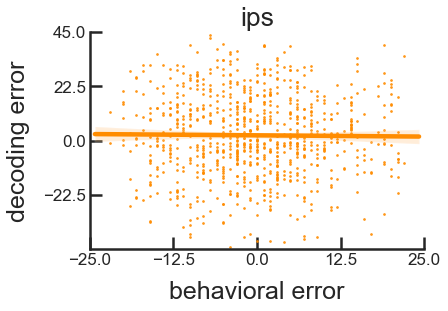

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: actual_Error
No. Observations: 842     Method:             REML        
No. Groups:       6       Scale:              88.2438     
Min. group size:  122     Likelihood:         -3087.0869  
Max. group size:  147     Converged:          Yes         
Mean group size:  140.3                                   
-----------------------------------------------------------
            Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept   -0.623     0.719  -0.867  0.386  -2.033   0.786
error       -0.011     0.019  -0.557  0.578  -0.048   0.027
Group Var    2.461     0.208                               



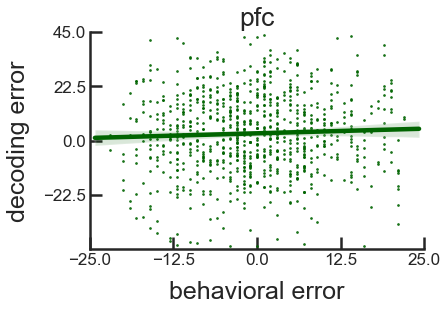

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: actual_Error
No. Observations: 849     Method:             REML        
No. Groups:       6       Scale:              87.1657     
Min. group size:  127     Likelihood:         -3107.8906  
Max. group size:  147     Converged:          Yes         
Mean group size:  141.5                                   
-----------------------------------------------------------
            Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept   -0.814     0.773  -1.054  0.292  -2.329   0.700
error        0.027     0.019   1.398  0.162  -0.011   0.065
Group Var    2.944     0.241                               



In [105]:
colors_ = ['darkblue', 'darkorange', 'darkgreen']

for idxr, Region in enumerate(['visual', 'ips', 'pfc']):
    #
    df_corr = df_delay_target.loc[(df_delay_target['actual_Error']>-999) & 
                                  (df_delay_target['error']>-999) & 
                                  (df_delay_target['label_target']=='T') & 
                                  (df_delay_target['brain_region']==Region) & 
                                  (df_delay_target['actual_Error']<22.5) & (df_delay_target['actual_Error']>-22.5)]
    #
    sns.regplot(df_corr.actual_Error, df_corr.error, marker="o", color=colors_[idxr], scatter_kws={'s':3} )
    plt.xticks([-25, -12.5, 0, 12.5, 25], fontsize=17)
    plt.yticks([-22.5, 0, 22.5, 45], fontsize=17)
    plt.ylim(-45,45)
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.gca().tick_params(direction='in') #direction
    plt.xlabel('behavioral error', fontsize=25,  labelpad=13)
    plt.ylabel('decoding error', fontsize=25,  labelpad=13)
    plt.title(Region)
    #plt.gca().tick_params(axis='both', which='major', pad=0)


    plt.show()
    #
    #res_m = smf.ols(formula='actual_Error ~ error', data=df_corr).fit()
    res_m = smf.mixedlm(formula='actual_Error ~ error', data=df_corr,
                    groups=df_corr['subject']).fit()
    print(res_m.summary())

In [107]:
0.482/2

0.241

In [106]:
0.578/2

0.289

In [73]:
0.122/2

0.061

In [70]:
df.TR.unique()

array([ 9.34 , 11.675,  0.   ,  2.335,  4.67 ,  7.005, 14.01 , 16.345,
       18.68 , 21.015, 23.35 , 25.685, 28.02 , 30.355, 32.69 , 35.025])

In [ ]:
## Los 2 TR pre response (tal vez 1 es muy poco...)

In [7]:
c1_02 = df.loc[(df['condition']=='1_0.2') & 
                ( (df['TR']== 14.01) | (df['TR']== 16.345) )]

c1_7 = df.loc[(df['condition']=='1_7') & 
              ( (df['TR']== 9.34) | (df['TR']== 11.675) ) ]

c2_02 = df.loc[(df['condition']=='2_0.2') & 
                  ( (df['TR']== 14.01) | (df['TR']== 16.345) ) ]

c2_7 = df.loc[(df['condition']=='2_7') & 
              ( (df['TR']== 21.015) | (df['TR']== 23.35) ) ]


df_delay_target = pd.concat([c1_02, c1_7, c2_02, c2_7])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


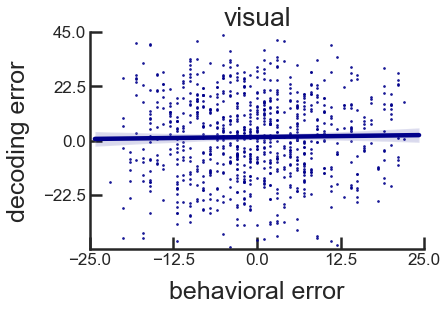

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: actual_Error
No. Observations: 834     Method:             REML        
No. Groups:       6       Scale:              87.4174     
Min. group size:  126     Likelihood:         -3054.4891  
Max. group size:  149     Converged:          Yes         
Mean group size:  139.0                                   
-----------------------------------------------------------
            Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept   -0.646     0.811  -0.796  0.426  -2.235   0.944
error        0.014     0.019   0.703  0.482  -0.024   0.052
Group Var    3.311     0.267                               



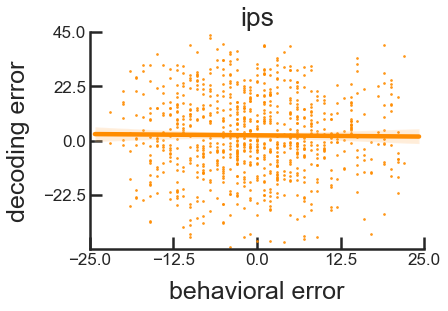

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: actual_Error
No. Observations: 842     Method:             REML        
No. Groups:       6       Scale:              88.2438     
Min. group size:  122     Likelihood:         -3087.0869  
Max. group size:  147     Converged:          Yes         
Mean group size:  140.3                                   
-----------------------------------------------------------
            Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept   -0.623     0.719  -0.867  0.386  -2.033   0.786
error       -0.011     0.019  -0.557  0.578  -0.048   0.027
Group Var    2.461     0.208                               



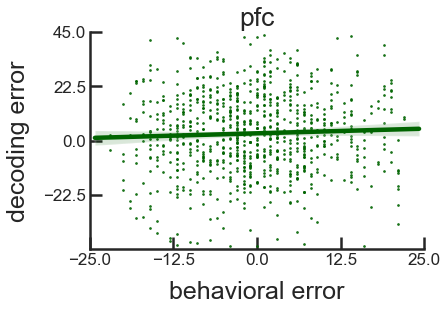

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: actual_Error
No. Observations: 849     Method:             REML        
No. Groups:       6       Scale:              87.1657     
Min. group size:  127     Likelihood:         -3107.8906  
Max. group size:  147     Converged:          Yes         
Mean group size:  141.5                                   
-----------------------------------------------------------
            Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept   -0.814     0.773  -1.054  0.292  -2.329   0.700
error        0.027     0.019   1.398  0.162  -0.011   0.065
Group Var    2.944     0.241                               



In [10]:
colors_ = ['darkblue', 'darkorange', 'darkgreen']

for idxr, Region in enumerate(['visual', 'ips', 'pfc']):
    #
    df_corr = df_delay_target.loc[(df_delay_target['actual_Error']>-999) & 
                                  (df_delay_target['error']>-999) & 
                                  (df_delay_target['label_target']=='T') & 
                                  (df_delay_target['brain_region']==Region) & 
                                  (df_delay_target['actual_Error']<22.5) & (df_delay_target['actual_Error']>-22.5)]
    #
    sns.regplot(df_corr.actual_Error, df_corr.error, marker="o", color=colors_[idxr], scatter_kws={'s':3} )
    plt.xticks([-25, -12.5, 0, 12.5, 25], fontsize=17)
    plt.yticks([-22.5, 0, 22.5, 45], fontsize=17)
    plt.ylim(-45,45)
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.gca().tick_params(direction='in') #direction
    plt.xlabel('behavioral error', fontsize=25,  labelpad=13)
    plt.ylabel('decoding error', fontsize=25,  labelpad=13)
    plt.title(Region)
    plt.show()
    #
    #res_m = smf.ols(formula='actual_Error ~ error', data=df_corr).fit()
    res_m = smf.mixedlm(formula='actual_Error ~ error', data=df_corr,
                    groups=df_corr['subject']).fit()
    print(res_m.summary())

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


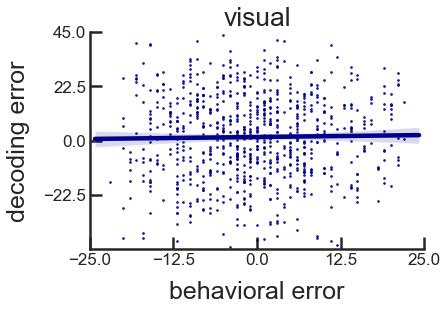

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: actual_Error
No. Observations: 834     Method:             REML        
No. Groups:       6       Scale:              87.4174     
Min. group size:  126     Likelihood:         -3054.4891  
Max. group size:  149     Converged:          Yes         
Mean group size:  139.0                                   
-----------------------------------------------------------
            Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept   -0.646     0.811  -0.796  0.426  -2.235   0.944
error        0.014     0.019   0.703  0.482  -0.024   0.052
Group Var    3.311     0.267                               



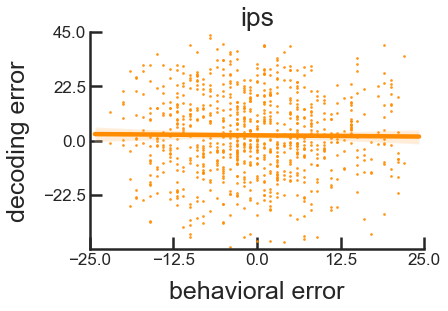

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: actual_Error
No. Observations: 842     Method:             REML        
No. Groups:       6       Scale:              88.2438     
Min. group size:  122     Likelihood:         -3087.0869  
Max. group size:  147     Converged:          Yes         
Mean group size:  140.3                                   
-----------------------------------------------------------
            Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept   -0.623     0.719  -0.867  0.386  -2.033   0.786
error       -0.011     0.019  -0.557  0.578  -0.048   0.027
Group Var    2.461     0.208                               



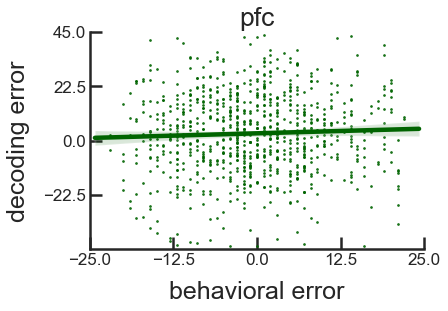

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: actual_Error
No. Observations: 849     Method:             REML        
No. Groups:       6       Scale:              87.1657     
Min. group size:  127     Likelihood:         -3107.8906  
Max. group size:  147     Converged:          Yes         
Mean group size:  141.5                                   
-----------------------------------------------------------
            Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept   -0.814     0.773  -1.054  0.292  -2.329   0.700
error        0.027     0.019   1.398  0.162  -0.011   0.065
Group Var    2.944     0.241                               



In [13]:
colors_ = ['darkblue', 'darkorange', 'darkgreen']

for idxr, Region in enumerate(['visual', 'ips', 'pfc']):
    #
    df_corr = df_delay_target.loc[(df_delay_target['actual_Error']>-999) & 
                                  (df_delay_target['error']>-999) & 
                                  (df_delay_target['label_target']=='T') & 
                                  (df_delay_target['brain_region']==Region) & 
                                  (df_delay_target['actual_Error']<22.5) & (df_delay_target['actual_Error']>-22.5)]
    #
    sns.regplot(df_corr.actual_Error, df_corr.error, marker="o", color=colors_[idxr], scatter_kws={'s':3} )
    plt.xticks([-25, -12.5, 0, 12.5, 25], fontsize=17)
    plt.yticks([-22.5, 0, 22.5, 45], fontsize=17)
    plt.ylim(-45,45)
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.gca().tick_params(direction='in') #direction
    plt.xlabel('behavioral error', fontsize=25,  labelpad=13)
    plt.ylabel('decoding error', fontsize=25,  labelpad=13)
    plt.title(Region)
    plt.show()
    #
    #res_m = smf.ols(formula='actual_Error ~ error', data=df_corr).fit()
    res_m = smf.mixedlm(formula='actual_Error ~ error', data=df_corr,
                    groups=df_corr['subject']).fit()
    print(res_m.summary())

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\matplotlib\cbook\deprecation.py:107: Matplo

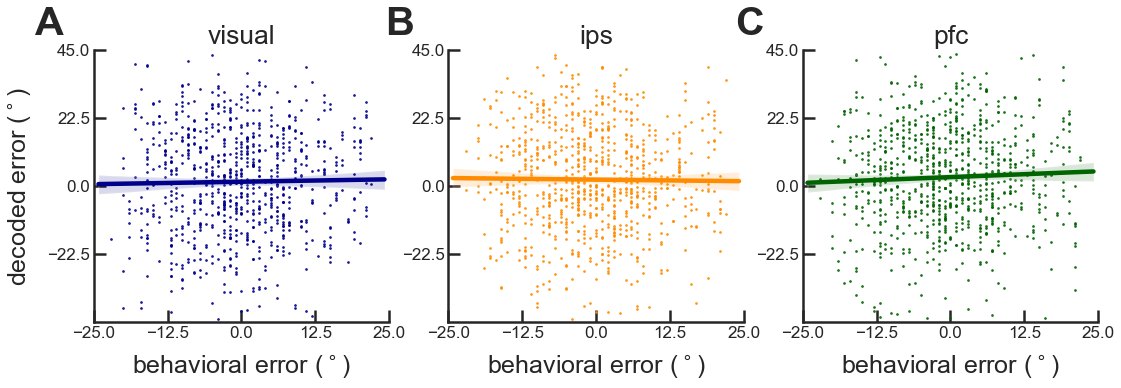

In [23]:

f = plt.figure(figsize=(18,5))
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

axes = [ax1, ax2, ax3]

f.text(0.08, 0.95, "A", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=40)
f.text(0.35, 0.95, "B", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=40)
f.text(0.62, 0.95, "C", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=40)




colors_ = ['darkblue', 'darkorange', 'darkgreen']

for idxr, Region in enumerate(['visual', 'ips', 'pfc']):
    number_ = '13' + str(idxr+1)
    AX =  axes[idxr]
    #
    plt.subplot(int(number_))
    #
    df_corr = df_delay_target.loc[(df_delay_target['actual_Error']>-999) & 
                                  (df_delay_target['error']>-999) & 
                                  (df_delay_target['label_target']=='T') & 
                                  (df_delay_target['brain_region']==Region) & 
                                  (df_delay_target['actual_Error']<22.5) & (df_delay_target['actual_Error']>-22.5)]
    #
    sns.regplot(df_corr.actual_Error, df_corr.error, marker="o", color=colors_[idxr], scatter_kws={'s':3} )
    plt.xticks([-25, -12.5, 0, 12.5, 25], fontsize=17)
    plt.yticks([-22.5, 0, 22.5, 45], fontsize=17)
    plt.ylim(-45,45)
    AX.spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    AX.spines['top'].set_visible(False)                                                                                  # remove top spines
    AX.get_xaxis().tick_bottom()                                                                                         
    AX.get_yaxis().tick_left()
    AX.tick_params(direction='in') #direction
    plt.xlabel(r'behavioral error ($^\circ$)', fontsize=25,  labelpad=13)
    if idxr==0:
        plt.ylabel(r'decoded error ($^\circ$)', fontsize=25,  labelpad=13)
    else:
        plt.ylabel('')
    plt.title(Region)
    
plt.savefig('C:\\Users\\David\\Desktop\\correlation_decoding_error.svg', transparent=True )

In [67]:
## los TRs del delay period del target

In [68]:
c1_02 = df.loc[(df['condition']=='1_0.2') & 
                   ( (df['TR']>= 9.34) & (df['TR']<= 16.345) )]

c1_7 = df.loc[(df['condition']=='1_7') & 
                   ( (df['TR']>= 9.34) & (df['TR']<= 14.01) )]

c2_02 = df.loc[(df['condition']=='2_0.2') & 
                   ( (df['TR']>= 9.34) & (df['TR']<= 16.345) )]

c2_7 = df.loc[(df['condition']=='2_7') & 
                   ( (df['TR']>= 16.345) & (df['TR']<= 23.35) )]


df_delay_target = pd.concat([c1_02, c1_7, c2_02, c2_7])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


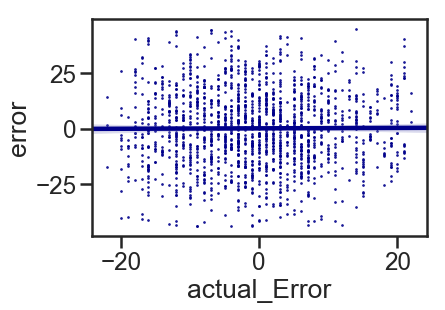

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: actual_Error
No. Observations: 1657    Method:             REML        
No. Groups:       6       Scale:              86.8273     
Min. group size:  249     Likelihood:         -6058.5478  
Max. group size:  288     Converged:          Yes         
Mean group size:  276.2                                   
-----------------------------------------------------------
            Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept   -0.668     0.770  -0.868  0.385  -2.176   0.841
error        0.006     0.013   0.432  0.666  -0.020   0.032
Group Var    3.239     0.241                               



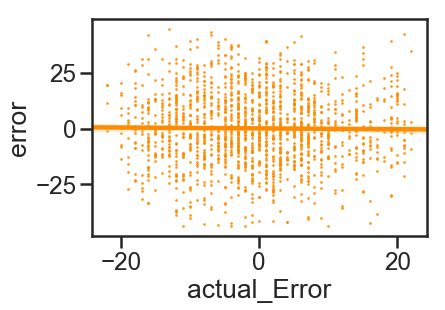

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: actual_Error
No. Observations: 1670    Method:             REML        
No. Groups:       6       Scale:              87.9455     
Min. group size:  245     Likelihood:         -6116.3693  
Max. group size:  290     Converged:          Yes         
Mean group size:  278.3                                   
-----------------------------------------------------------
            Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept   -0.721     0.731  -0.985  0.324  -2.154   0.713
error       -0.007     0.014  -0.463  0.644  -0.034   0.021
Group Var    2.893     0.216                               



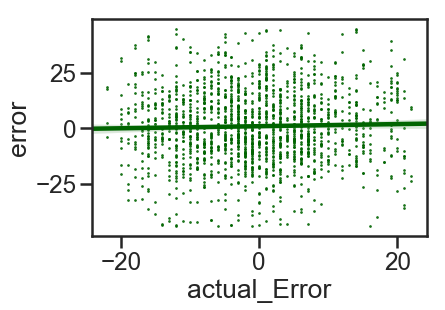

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: actual_Error
No. Observations: 1668    Method:             REML        
No. Groups:       6       Scale:              86.4316     
Min. group size:  244     Likelihood:         -6094.9358  
Max. group size:  293     Converged:          Yes         
Mean group size:  278.0                                   
-----------------------------------------------------------
            Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept   -0.822     0.775  -1.060  0.289  -2.341   0.697
error        0.017     0.014   1.220  0.222  -0.010   0.044
Group Var    3.291     0.245                               



In [69]:
colors_ = ['darkblue', 'darkorange', 'darkgreen']

for idxr, Region in enumerate(['visual', 'ips', 'pfc']):
    #
    df_corr = df_delay_target.loc[(df_delay_target['actual_Error']>-999) & 
                                  (df_delay_target['error']>-999) & 
                                  (df_delay_target['label_target']=='T') & 
                                  (df_delay_target['brain_region']==Region) & 
                                  (df_delay_target['actual_Error']<22.5) & (df_delay_target['actual_Error']>-22.5)]
    #
    sns.regplot(df_corr.actual_Error, df_corr.error, marker="o", color=colors_[idxr], scatter_kws={'s':3} )
    plt.show()
    #
    #res_m = smf.ols(formula='actual_Error ~ error', data=df_corr).fit()
    res_m = smf.mixedlm(formula='actual_Error ~ error', data=df_corr,
                    groups=df_corr['subject']).fit()
    print(res_m.summary())